In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import glob
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.ticker as ticker

Welcome to JupyROOT 6.26/04


In [7]:
def cal_eff_purity_ownMC(file_name,file_list, tree, base_filter, N_gen):
    
    variables = ['Dstarp_isSignal','D0_M','__experiment__', '__run__', '__event__']
    
    N_rec = 0

    # Initialize an empty dataframe to store concatenated results
    concatenated_df = pd.DataFrame()

    for file in file_list:
        recon_df = get_pd(file, tree, base_filter, variables)
        N_rec += len(recon_df)
        extracted_df = recon_df[["__experiment__", "__run__", "__event__"]].drop_duplicates()

        # Concatenate the extracted dataframe with the concatenated_df
        concatenated_df = pd.concat([concatenated_df, extracted_df], ignore_index=True)

    multiplicity = N_rec / len(concatenated_df) 

    eff = N_rec/N_gen
    
    recon_df = get_pd(file_name, tree, base_filter, variables)
    N_true = len(recon_df.query('Dstarp_isSignal==1'))
    purity = N_true/N_rec
    signal_eff = eff * purity
    
    signal_eff_error = math.sqrt(signal_eff * (1 - signal_eff) / N_gen)
    
    print(f"signal_eff={signal_eff:.6f}, signal_eff_error={signal_eff_error: .6f} ,eff={eff:.6f}, purity={purity:.6f}, multiplicity={multiplicity:.6f}, ")
    
    return (signal_eff, eff, purity, multiplicity)

# D0 -> (eta -> gg) (eta -> gg)

In [22]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dtoetaeta_gg/240419_tight_v2_Kp_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter='etaeta_gg_rank==1'
tree = 'etaeta_gg_tag'
variables = ['D0_M','Dstarp_isSignal','Dstarp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dstarp_isSignal==1')
std_dev_Dp_M_true = df2['D0_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start =1.8648 - 4.5*std_dev_Dp_M_true
x_end =1.8648 + 4*std_dev_Dp_M_true
# x_start = 1.76
# x_end = 2.05
print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter='etaeta_gg_rank==1 && Dstarp_charge==1'
base_filter+=' &&  D0_M>' + str(x_start) + ' && D0_M<' + str(x_end)
tree = 'etaeta_gg_tag'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D0 -> (eta -> gg) (eta -> gg) eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.017905280265940477
1.784226238803268
1.9364211210637619
20
signal_eff=0.075627, signal_eff_error= 0.000264 ,eff=0.082004, purity=0.922236, multiplicity=1.000000, 
D0 -> (eta -> gg) (eta -> gg) eff:0.07562699999999999


82004


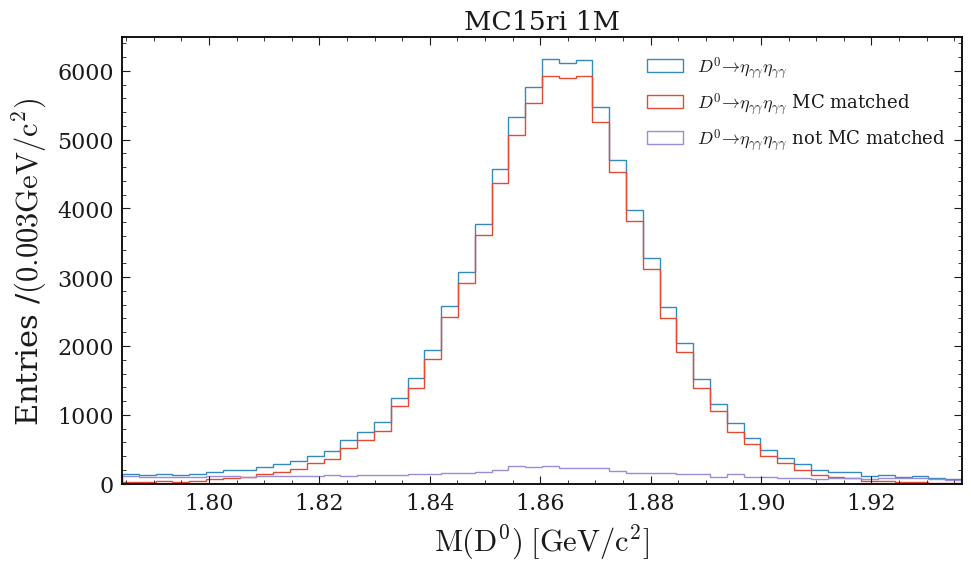

In [25]:
df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dstarp_isSignal==1')
df3 = df.query('Dstarp_isSignal!=1')

fig = plt.figure(figsize=(10, 6))

ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \eta_{\gamma\gamma} \eta_{\gamma\gamma}$');
plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \eta_{\gamma\gamma} \eta_{\gamma\gamma}$ MC matched');
plt.hist(df3["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \eta_{\gamma\gamma} \eta_{\gamma\gamma}$ not MC matched');

plt.legend(loc="upper right",fontsize=13)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_sig/gg/MC15ri_tight_v2_D0M_BCS_SR.png"
plt.savefig(file1_name)
print(len(df))

In [15]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dtoetaeta_gg/240419_tight_v2_Kp_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter='D0_M>0'
tree = 'etaeta_gg_tag'
variables = ['D0_M','Dstarp_isSignal','Dstarp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dstarp_isSignal==1')
std_dev_Dp_M_true = df2['D0_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start =1.8648 - 4.5*std_dev_Dp_M_true
x_end =1.8648 + 4*std_dev_Dp_M_true
# x_start = 1.76
# x_end = 2.05
print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter='Dstarp_charge==1'
base_filter+=' &&  D0_M>' + str(x_start) + ' && D0_M<' + str(x_end)
tree = 'etaeta_gg_tag'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D0 -> (eta -> gg) (eta -> gg) eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.017929158317002265
1.7841187875734899
1.936516633268009
20
signal_eff=0.079220, signal_eff_error= 0.000270 ,eff=0.087818, purity=0.902093, multiplicity=1.040769, 
D0 -> (eta -> gg) (eta -> gg) eff:0.07922


# D0 -> (eta -> gg) (eta -> pi+ pi- pi0)

In [27]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dtoetaeta_gg_pipipi/240419_tight_v2_Kp_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter='etaeta_gpi_rank==1'
tree = 'etaeta_gpi_tag'
variables = ['D0_M','Dstarp_isSignal','Dstarp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dstarp_isSignal==1')
std_dev_Dp_M_true = df2['D0_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start =1.8648 - 4.5*std_dev_Dp_M_true
x_end =1.8648 + 4*std_dev_Dp_M_true
# x_start = 1.76
# x_end = 2.05
print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter='etaeta_gpi_rank==1 && Dstarp_charge==1'
base_filter+=' &&  D0_M>' + str(x_start) + ' && D0_M<' + str(x_end)
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D0 -> (eta -> gg) (eta -> 3pi) eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.013688561418069671
1.8032014736186865
1.9195542456722787
20
signal_eff=0.039605, signal_eff_error= 0.000195 ,eff=0.045915, purity=0.862572, multiplicity=1.000000, 
D0 -> (eta -> gg) (eta -> 3pi) eff:0.039604999999999994


45915


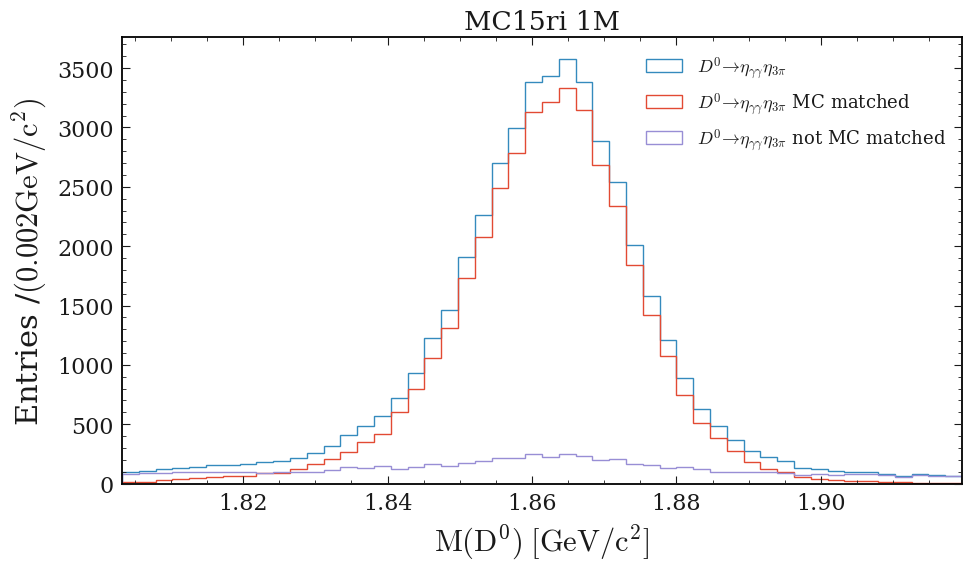

In [30]:
df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dstarp_isSignal==1')
df3 = df.query('Dstarp_isSignal!=1')

fig = plt.figure(figsize=(10, 6))

ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \eta_{\gamma\gamma} \eta_{3\pi}$');
plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \eta_{\gamma\gamma} \eta_{3\pi}$ MC matched');
plt.hist(df3["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \eta_{\gamma\gamma} \eta_{3\pi}$ not MC matched');

plt.legend(loc="upper right",fontsize=13)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_sig/gpi/MC15ri_tight_v2_D0M_BCS_SR.png"
plt.savefig(file1_name)
print(len(df))

In [16]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dtoetaeta_gg_pipipi/240419_tight_v2_Kp_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter='D0_M>0'
tree = 'etaeta_gpi_tag'
variables = ['D0_M','Dstarp_isSignal','Dstarp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dstarp_isSignal==1')
std_dev_Dp_M_true = df2['D0_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start =1.8648 - 4.5*std_dev_Dp_M_true
x_end =1.8648 + 4*std_dev_Dp_M_true
# x_start = 1.76
# x_end = 2.05
print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter=' Dstarp_charge==1'
base_filter+=' &&  D0_M>' + str(x_start) + ' && D0_M<' + str(x_end)
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D0 -> (eta -> gg) (eta -> 3pi) eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.013716941887723974
1.8030737615052421
1.919667767550896
20
signal_eff=0.042083, signal_eff_error= 0.000201 ,eff=0.051847, purity=0.811677, multiplicity=1.086438, 
D0 -> (eta -> gg) (eta -> 3pi) eff:0.042082999999999995


# D0 -> (eta -> pi+ pi- pi0) (eta -> pi+ pi- pi0)

In [31]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dtoetaeta_pipipi_pipipi/240419_tight_v2_Kp_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter='etaeta_pipi_rank==1'
tree = 'etaeta_pipi_tag'
variables = ['D0_M','Dstarp_isSignal','Dstarp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dstarp_isSignal==1')
std_dev_Dp_M_true = df2['D0_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start =1.8648 - 4.5*std_dev_Dp_M_true
x_end =1.8648 + 4*std_dev_Dp_M_true
# x_start = 1.76
# x_end = 2.05
print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter='etaeta_pipi_rank==1 && Dstarp_charge==1'
base_filter+=' &&  D0_M>' + str(x_start) + ' && D0_M<' + str(x_end)
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D0 -> (eta -> 3pi) (eta -> 3pi) eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.008320468486125688
1.8273578918124345
1.8980818739445027
20
signal_eff=0.021887, signal_eff_error= 0.000146 ,eff=0.026386, purity=0.829493, multiplicity=1.000000, 
D0 -> (eta -> 3pi) (eta -> 3pi) eff:0.021887


26386


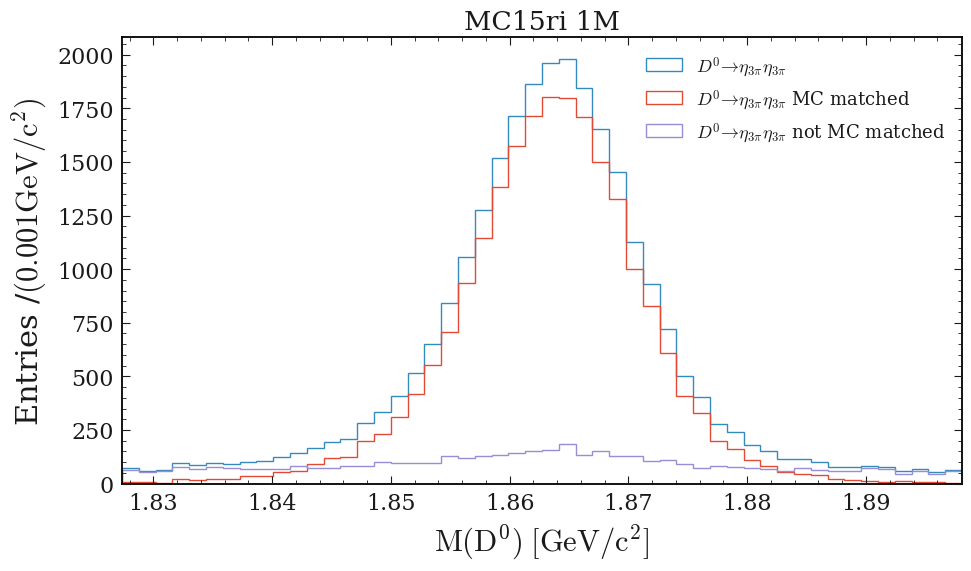

In [32]:
df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dstarp_isSignal==1')
df3 = df.query('Dstarp_isSignal!=1')

fig = plt.figure(figsize=(10, 6))

ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \eta_{3\pi} \eta_{3\pi}$');
plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \eta_{3\pi} \eta_{3\pi}$ MC matched');
plt.hist(df3["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \eta_{3\pi} \eta_{3\pi}$ not MC matched');

plt.legend(loc="upper right",fontsize=13)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_sig/pipi/MC15ri_tight_v2_D0M_BCS_SR.png"
plt.savefig(file1_name)
print(len(df))

In [19]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dtoetaeta_pipipi_pipipi/240419_tight_v2_Kp_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter='D0_M>0'
tree = 'etaeta_pipi_tag'
variables = ['D0_M','Dstarp_isSignal','Dstarp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dstarp_isSignal==1')
std_dev_Dp_M_true = df2['D0_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start =1.8648 - 4.5*std_dev_Dp_M_true
x_end =1.8648 + 4*std_dev_Dp_M_true
# x_start = 1.76
# x_end = 2.05
print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter='Dstarp_charge==1'
base_filter+=' &&  D0_M>' + str(x_start) + ' && D0_M<' + str(x_end)
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D0 -> (eta -> 3pi) (eta -> 3pi) eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.008389976278011557
1.827045106748948
1.8983599051120463
20
signal_eff=0.023723, signal_eff_error= 0.000152 ,eff=0.031225, purity=0.759744, multiplicity=1.114820, 
D0 -> (eta -> 3pi) (eta -> 3pi) eff:0.023723
